# PCA and LDA

Today, we are looking at some breast cancer data. We try to classify it.
The primary application of this dataset is binary classification, where machine learning models are trained to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on features extracted from digitized images of fine needle aspirate (FNA) samples.

## Import important packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# all the machine learning stuff
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_handler = load_breast_cancer()
df = pd.DataFrame(data_handler.data, columns=data_handler.feature_names)
# df['target'] = data.target

To get a feeling for the dataset, let's print the first five rows:

In [3]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

It is a good practice to work with pandas DataFrames. They behave very similar to numpy array. To avoid confusion for beginners, we continue with a numpy array.

In [4]:
data = df.values
print(data.shape)

(569, 30)


The array has 569 samples with 30 features.

## Data preprocessing
Recall: We need, that the every instance is mean free and has variance 1.  
TODO: Check, that the data is mean free and has a standard derivation of 1.

In [5]:
scaler = StandardScaler()  # create object
normalized_df = scaler.fit_transform(
    data
)  # calculate new values (fit) and apply it (transform)
# The mean is taken such that every feature has mean 0
# If you see an array with 30 entries, you chose the right axis
print(np.mean(normalized_df, axis=0))
print(np.std(normalized_df, axis=0))

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## PCA
Let's do the PCA:

In [6]:
pca = PCA(n_components=10)  # create object
data_pca = pca.fit_transform(
    normalized_df
)  # calculate new values (fit) and apply it (transform)
print(data_pca.shape)
print(pca.explained_variance_ratio_)

(569, 10)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


Make sure to have at least 80% in your data set.

In [7]:
print(np.sum(pca.explained_variance_ratio_))

0.9515688143366668


In [8]:
def plot_pca(scores, label_components=np.array([]), n_first=3):
    """
    plots n_first components against each other and saves the plots
    Arguments:
    scores: pca transformed data
    label_components: these information is written to the axis labels
        example: pca.explained_variance_ratio_
    n_first: number of components wich should be plot against each other
            (number of plots= n_first*(n_first-1)/2 )
    """
    if label_components.shape[0] == 0:
        label_components = np.arange(n_first) + 1
    else:
        label_components = np.round(label_components, 2)
    if n_first > label_components.shape[0]:
        n_first = label_components.shape[0]
    for i in range(n_first):
        for j in range(i + 1, n_first):
            plt.figure()
            plt.scatter(scores[:, i], scores[:, j])
            plt.xlabel("PC" + str(i) + " " + str(label_components[i]))
            plt.ylabel("PC" + str(j) + " " + str(label_components[j]))
            plt.title("PC" + str(i) + " vs PC" + str(j))
    plt.show()

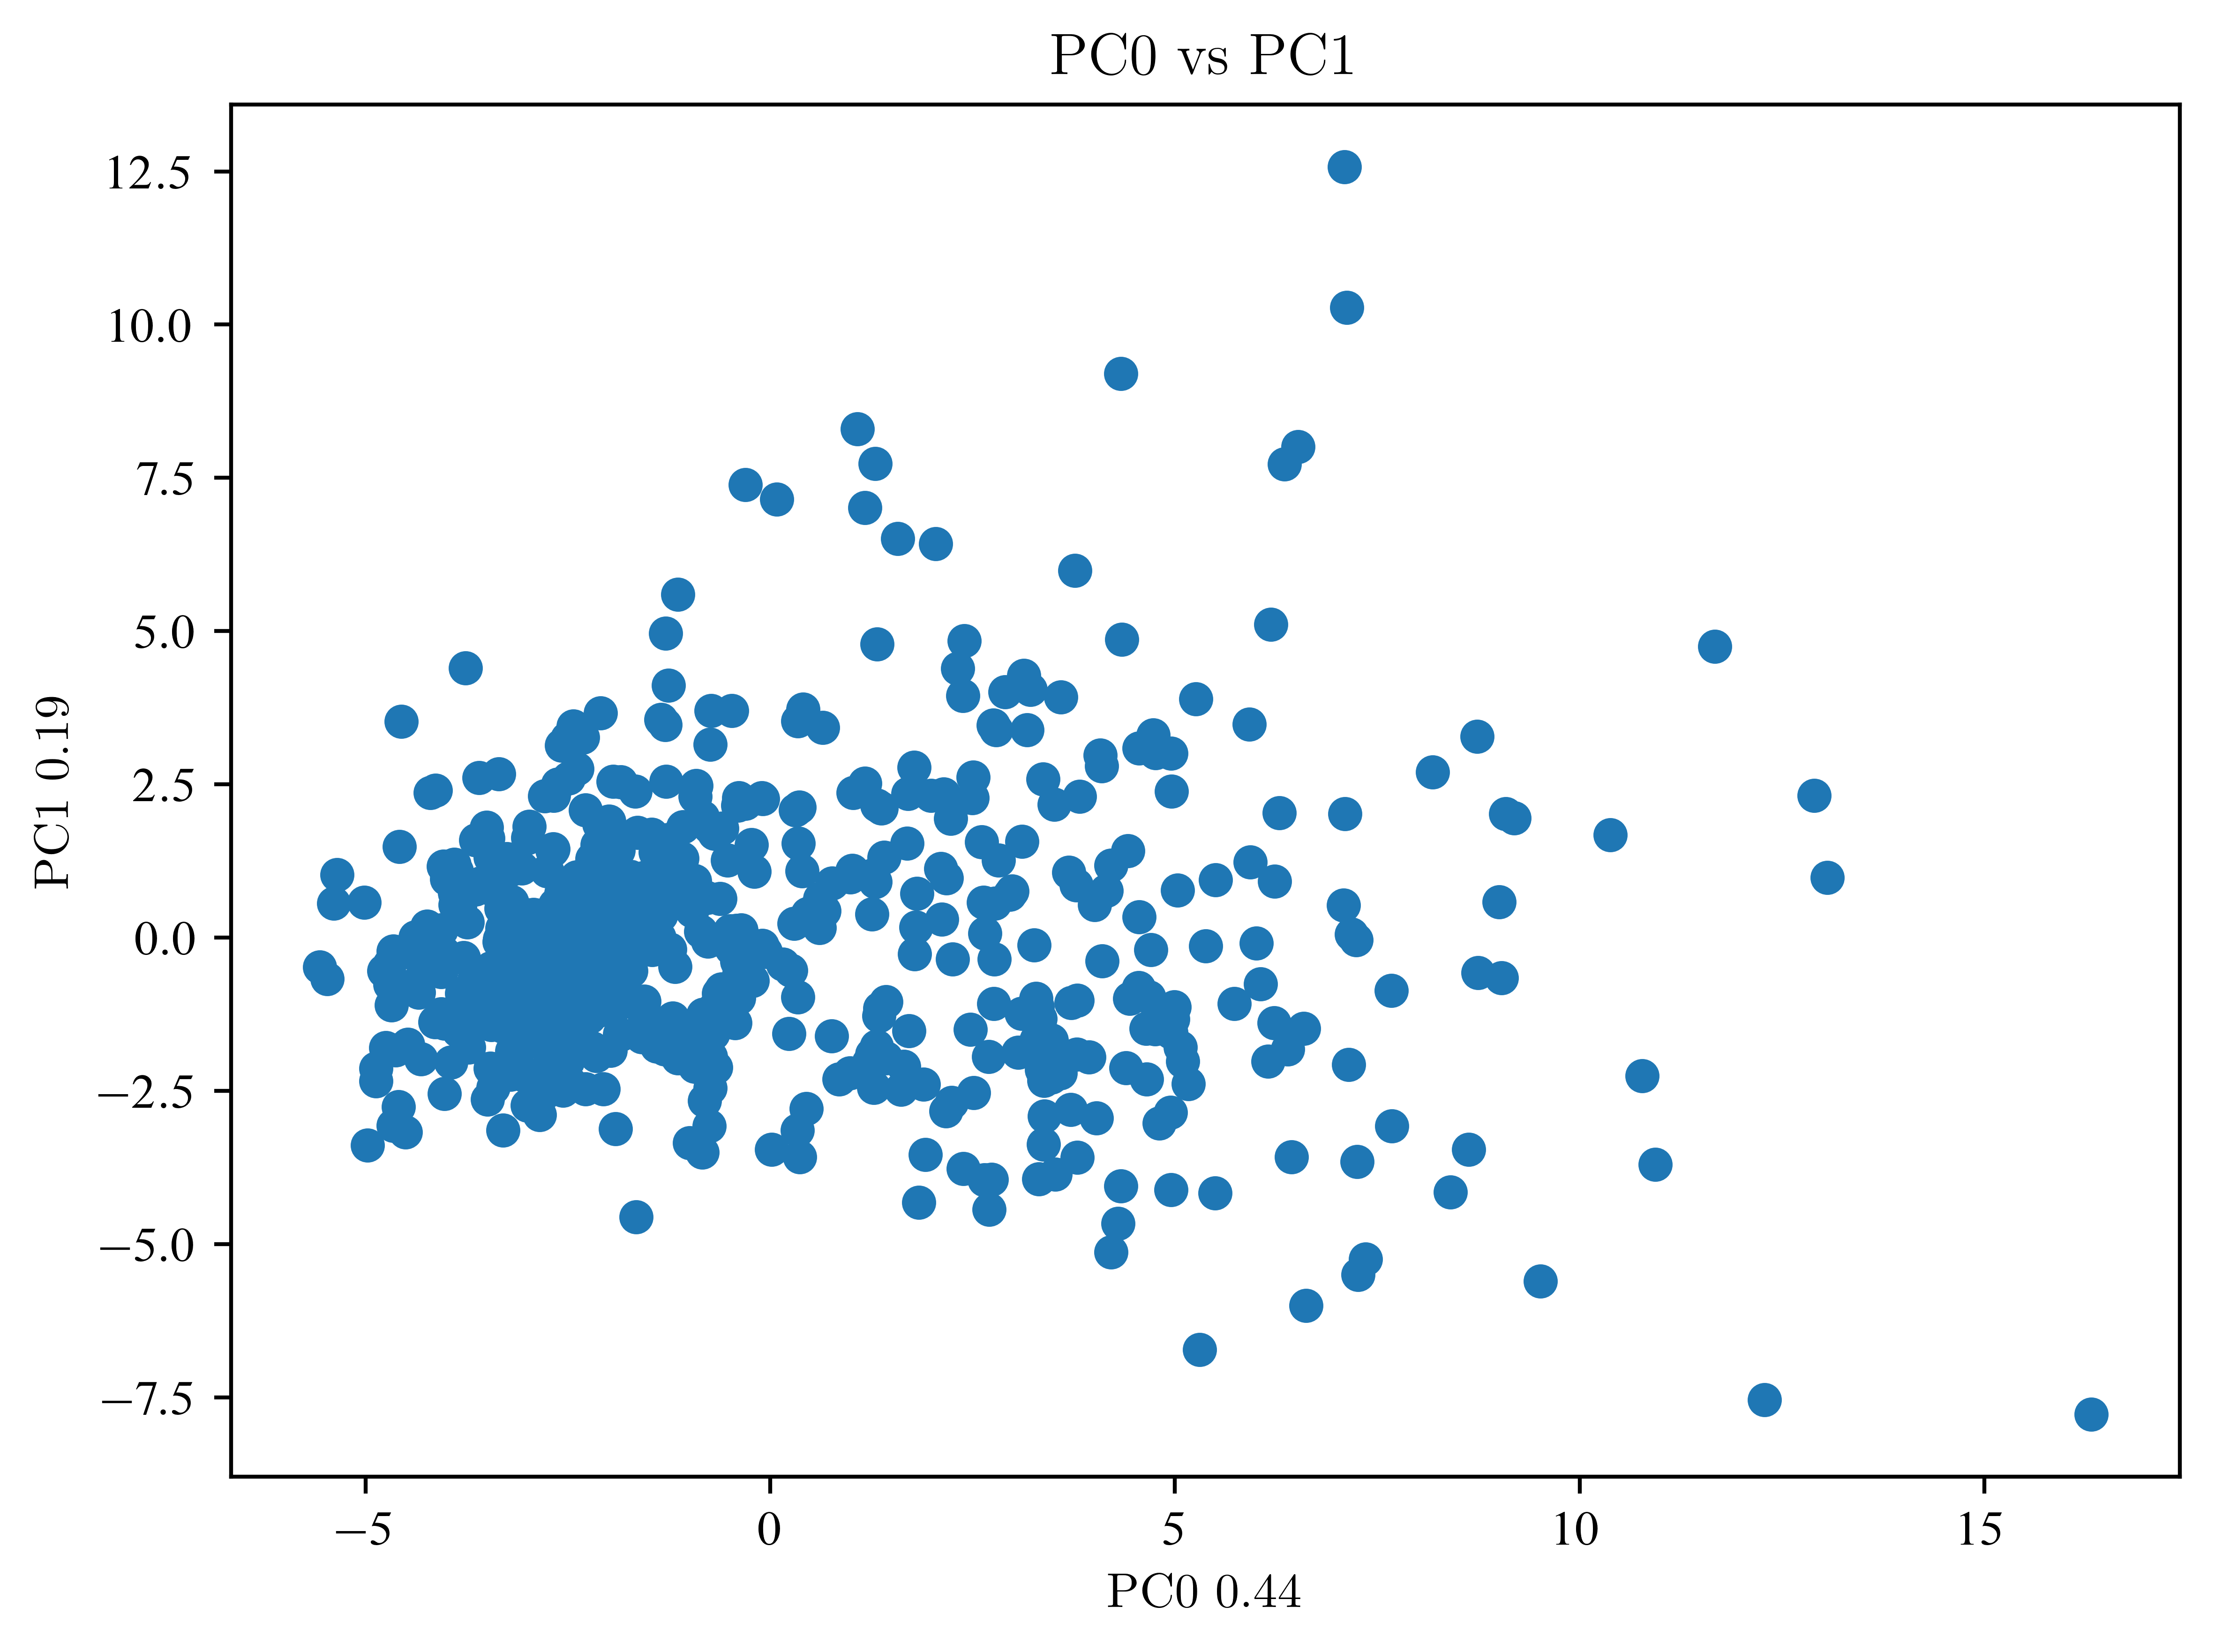

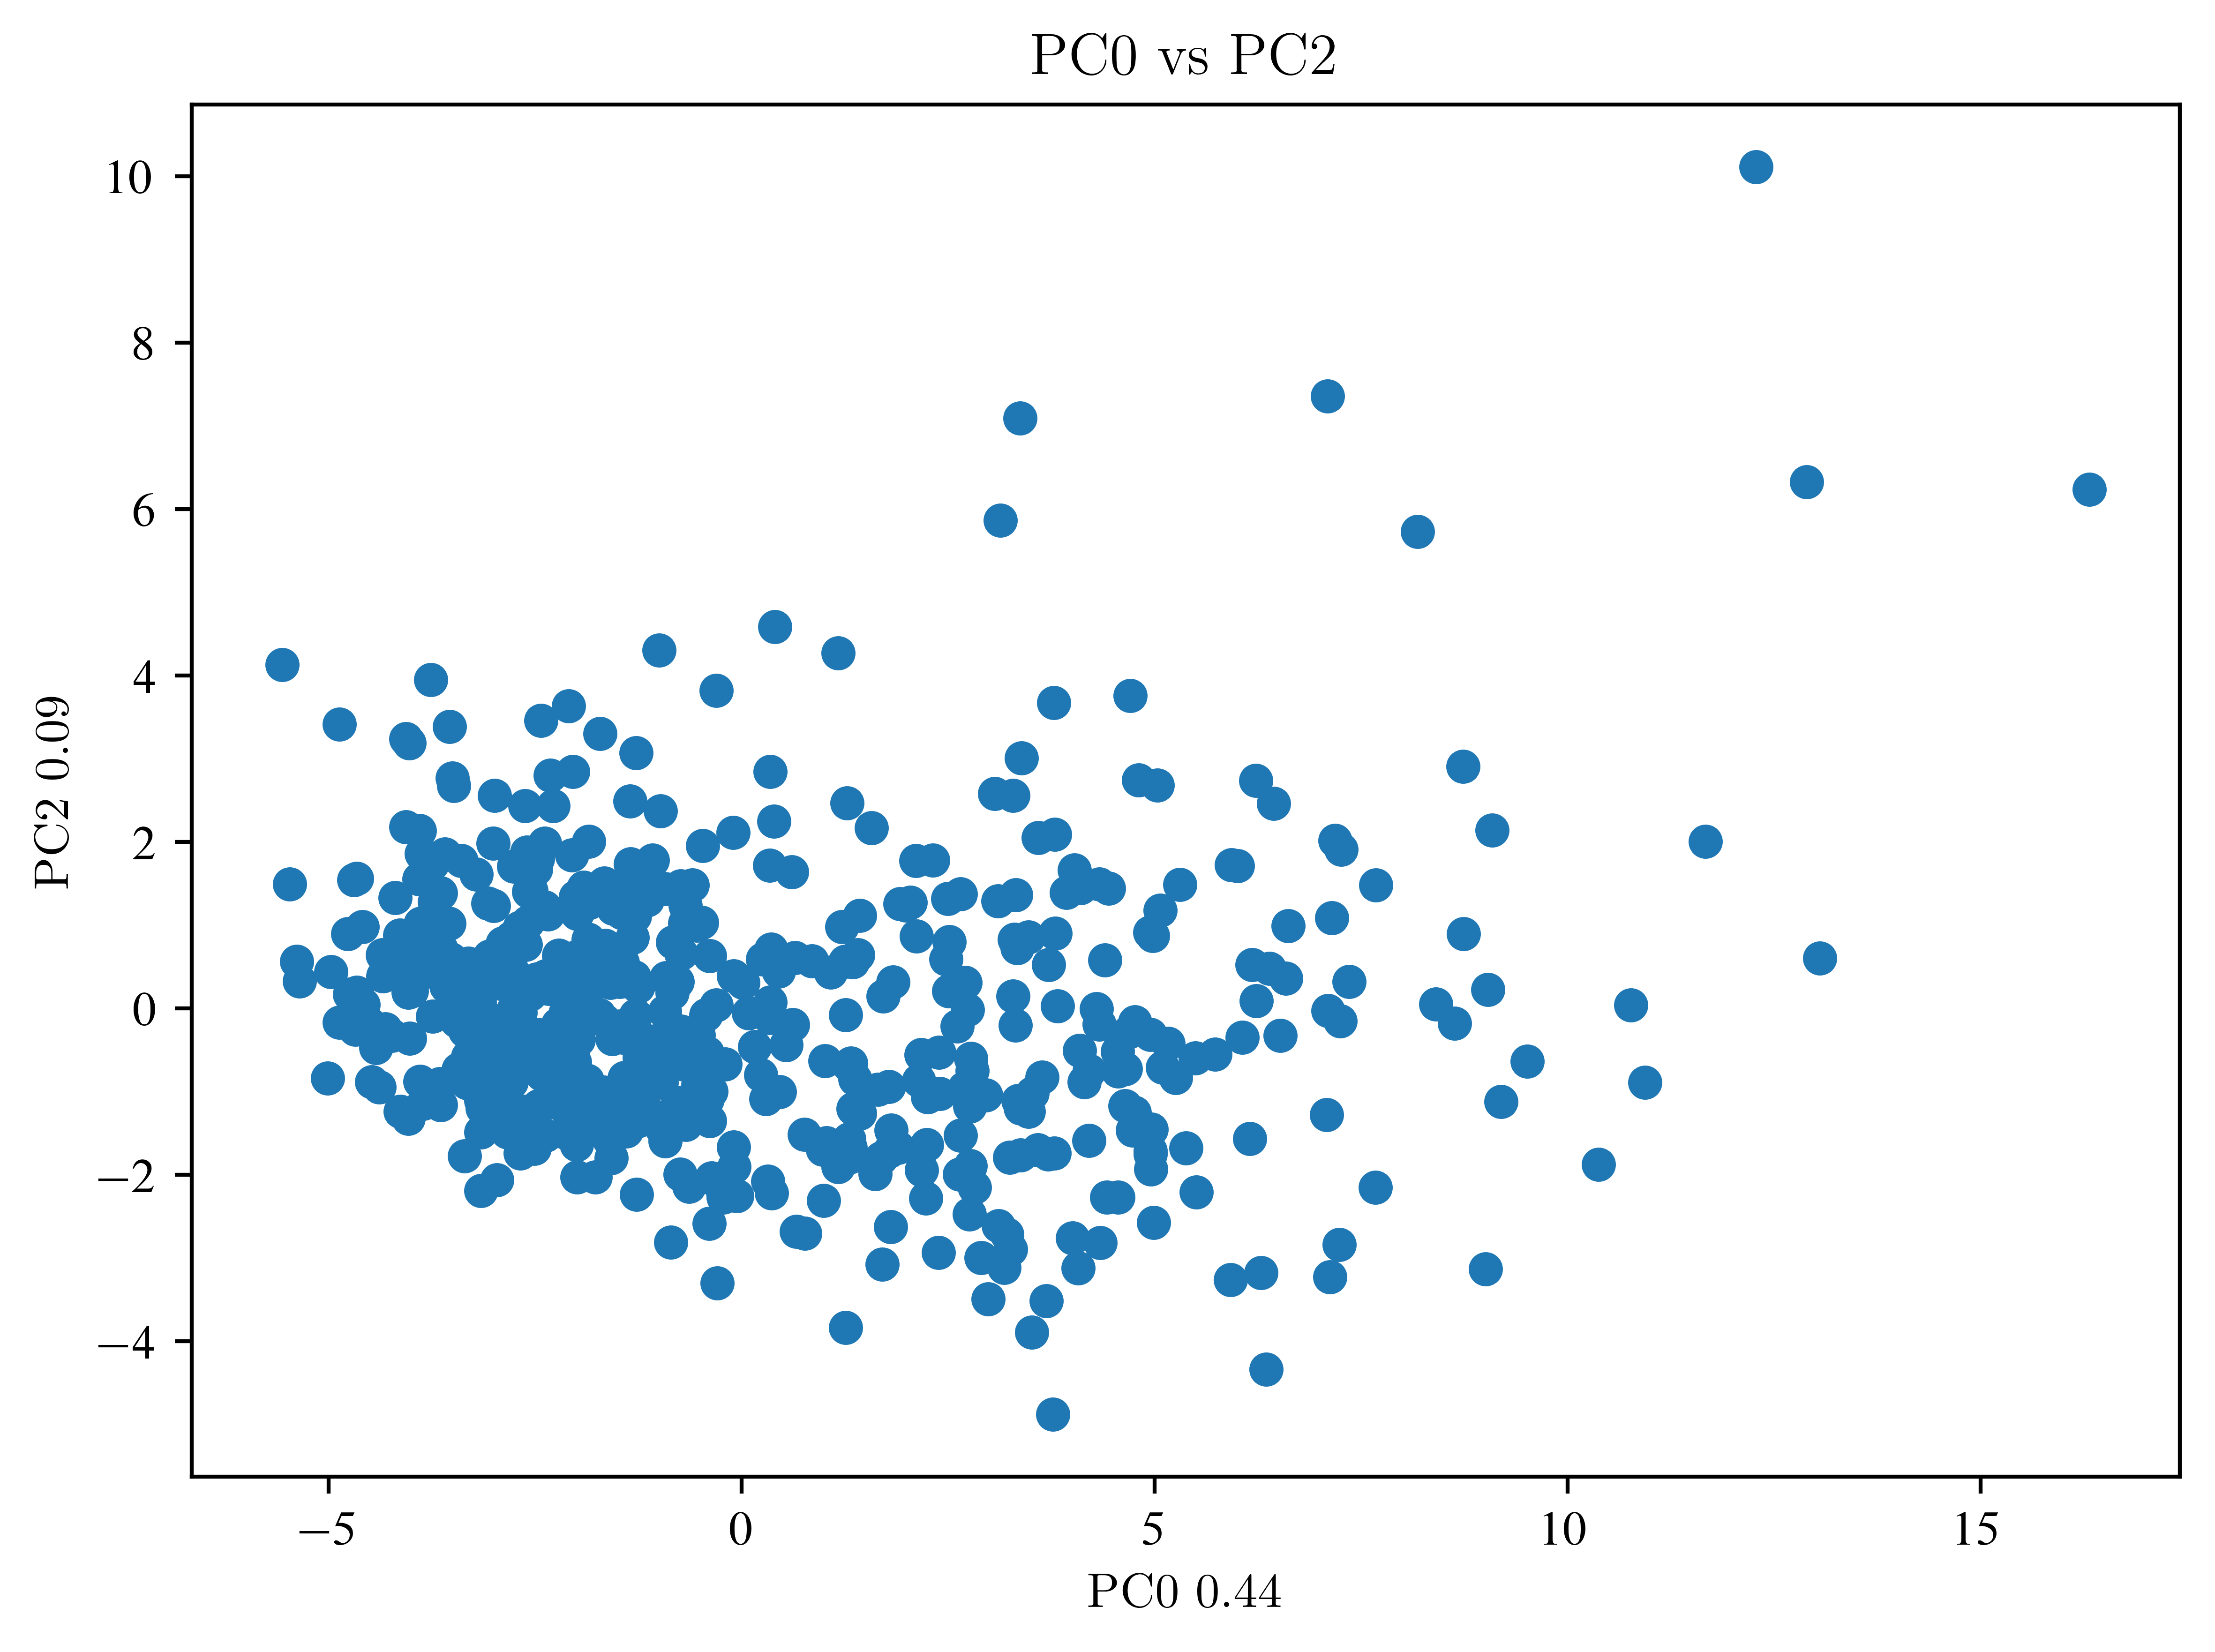

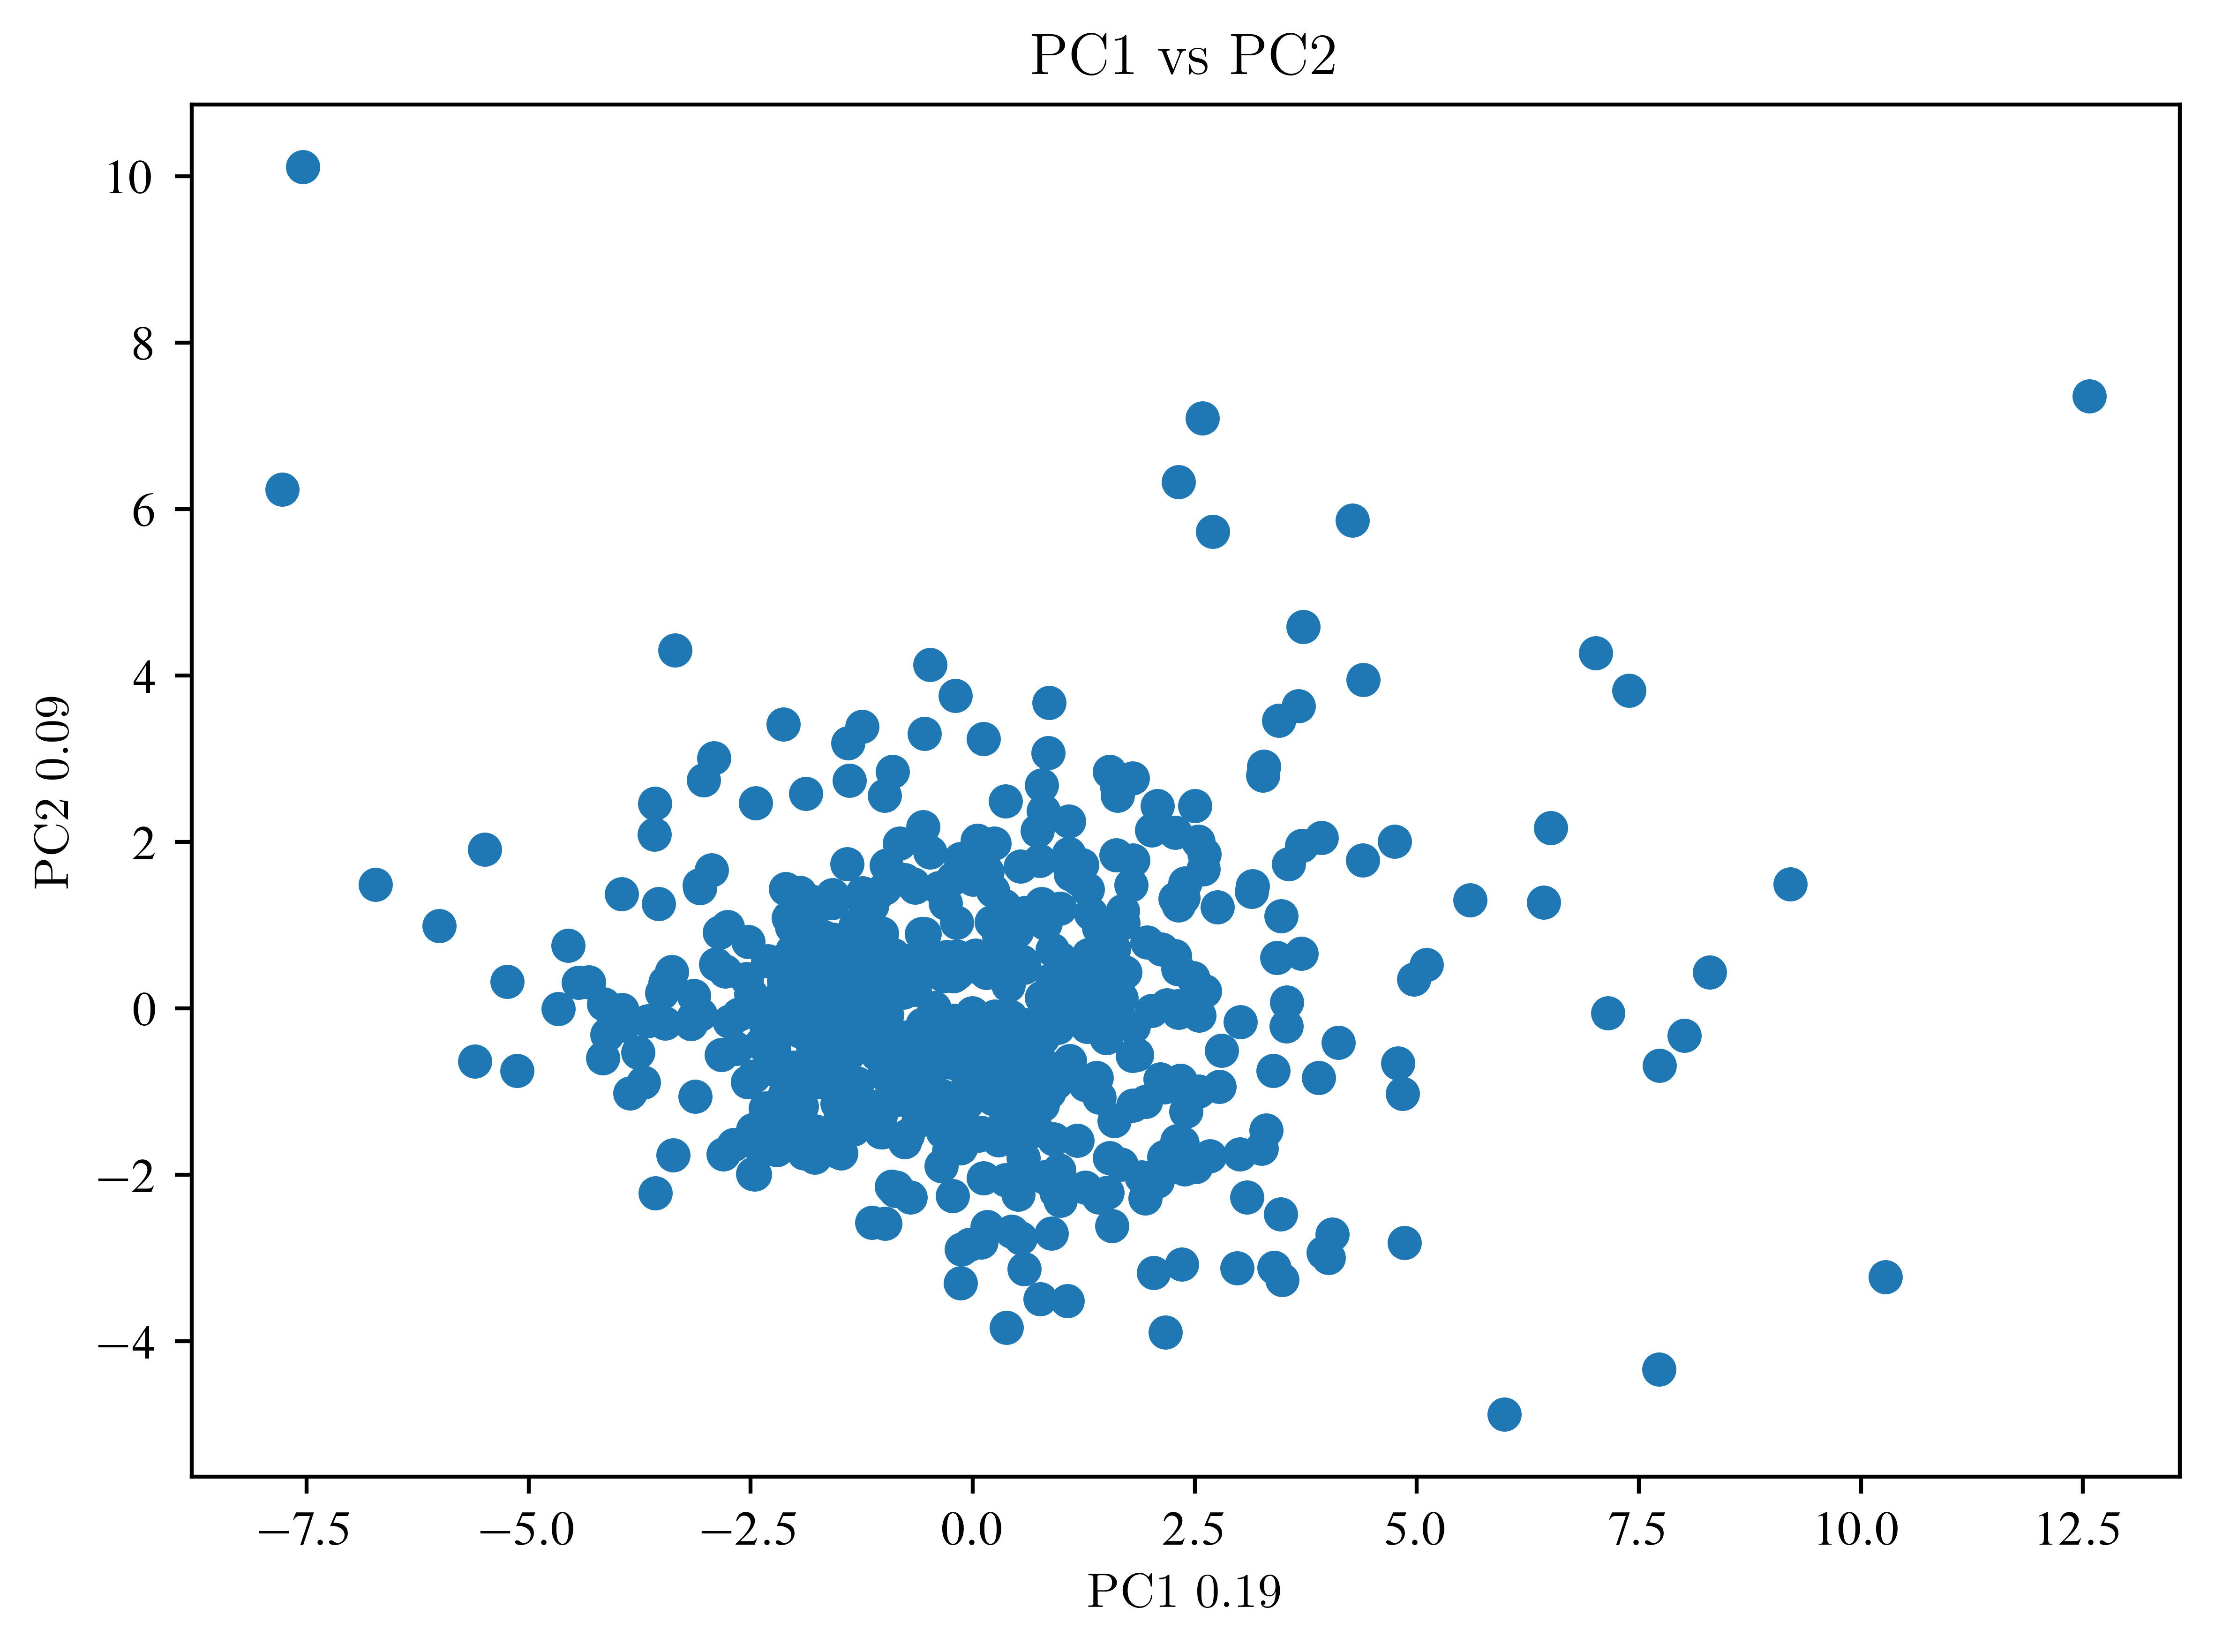

In [9]:
plot_pca(data_pca, label_components=pca.explained_variance_ratio_, n_first=3)

So far, not much can be seen. Then an LDA is necessary.

## LDA

Recall, the classification labels are stored in

In [11]:
print(data_handler["target"][0:23])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]


Because we are doing a classification, we subdivide our dataset into a training and a test dataset. (Usually, you do this BEFORE the PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, data_handler["target"], test_size=0.5, random_state=42
)

(284, 1)


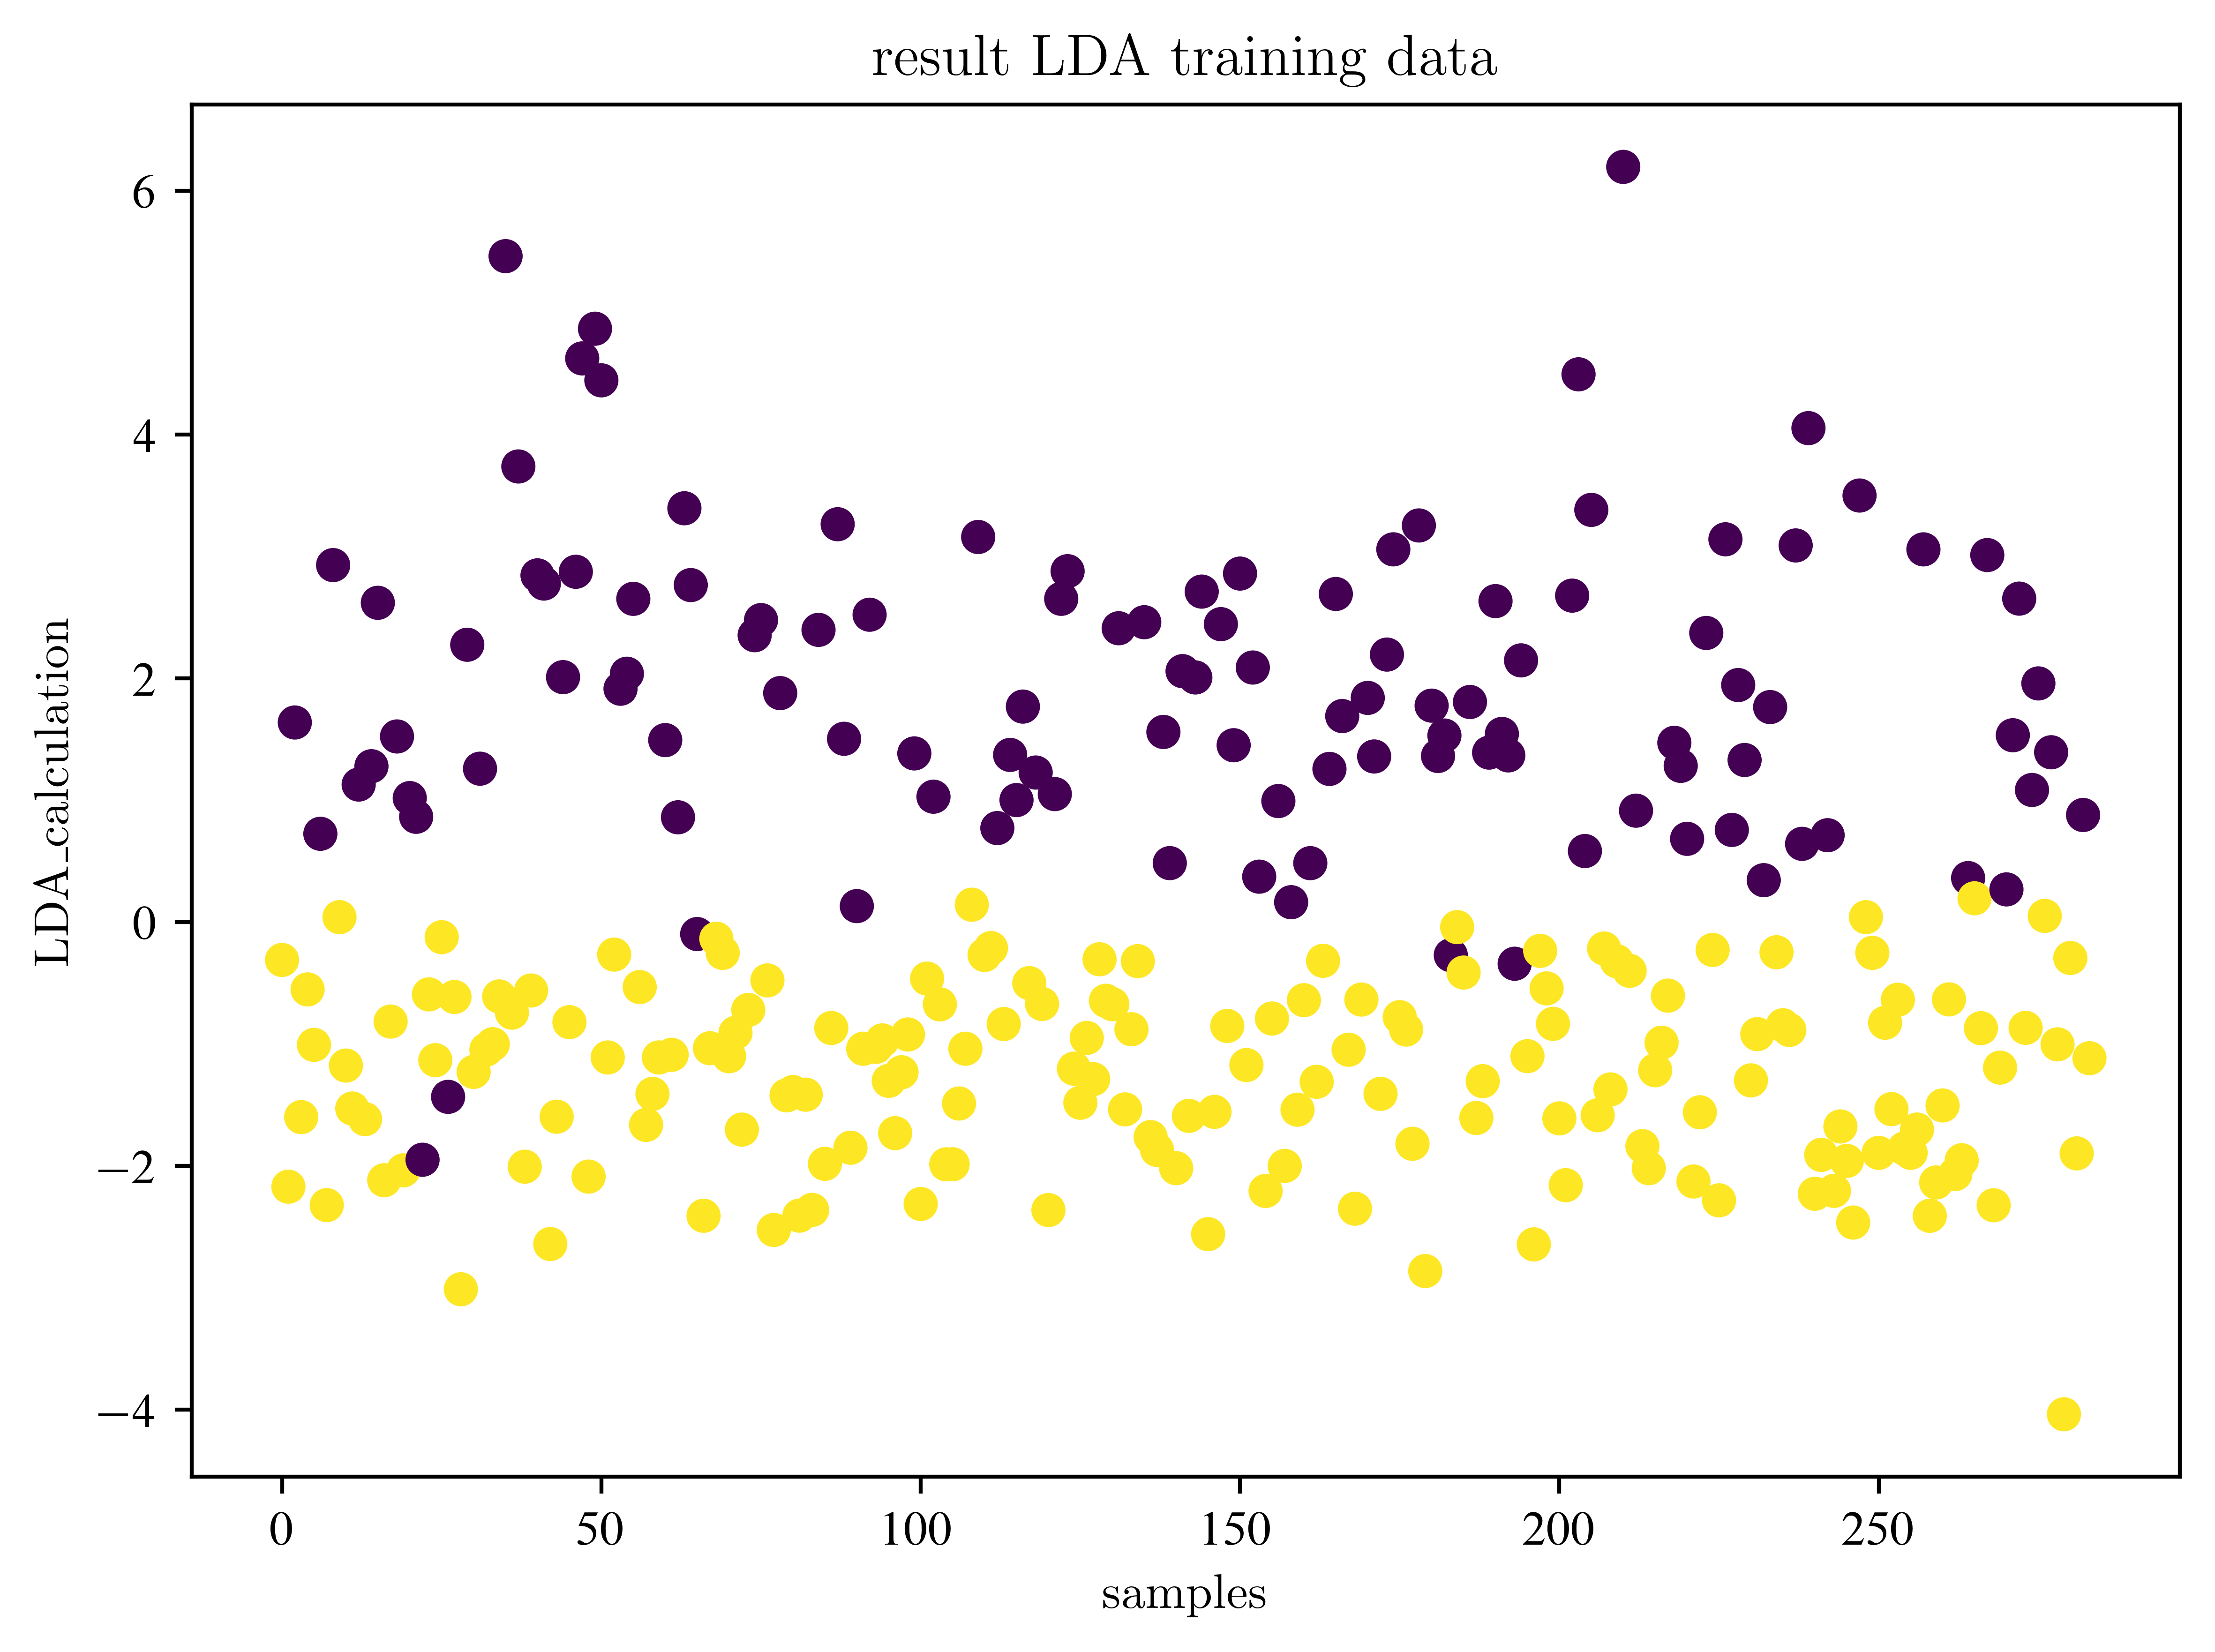

In [ ]:
# How many components do we need?
lda = LinearDiscriminantAnalysis(n_components=1)
data_lda = lda.fit_transform(X_train, y_train)
print(data_lda.shape)
samples = np.arange(data_lda.shape[0])
plt.scatter(samples, data_lda, c=y_train)
plt.title("result LDA training data")
plt.xlabel("samples")
plt.ylabel("LDA_calculation")
plt.show()

Where is the decision boundary?

6.195117075332792


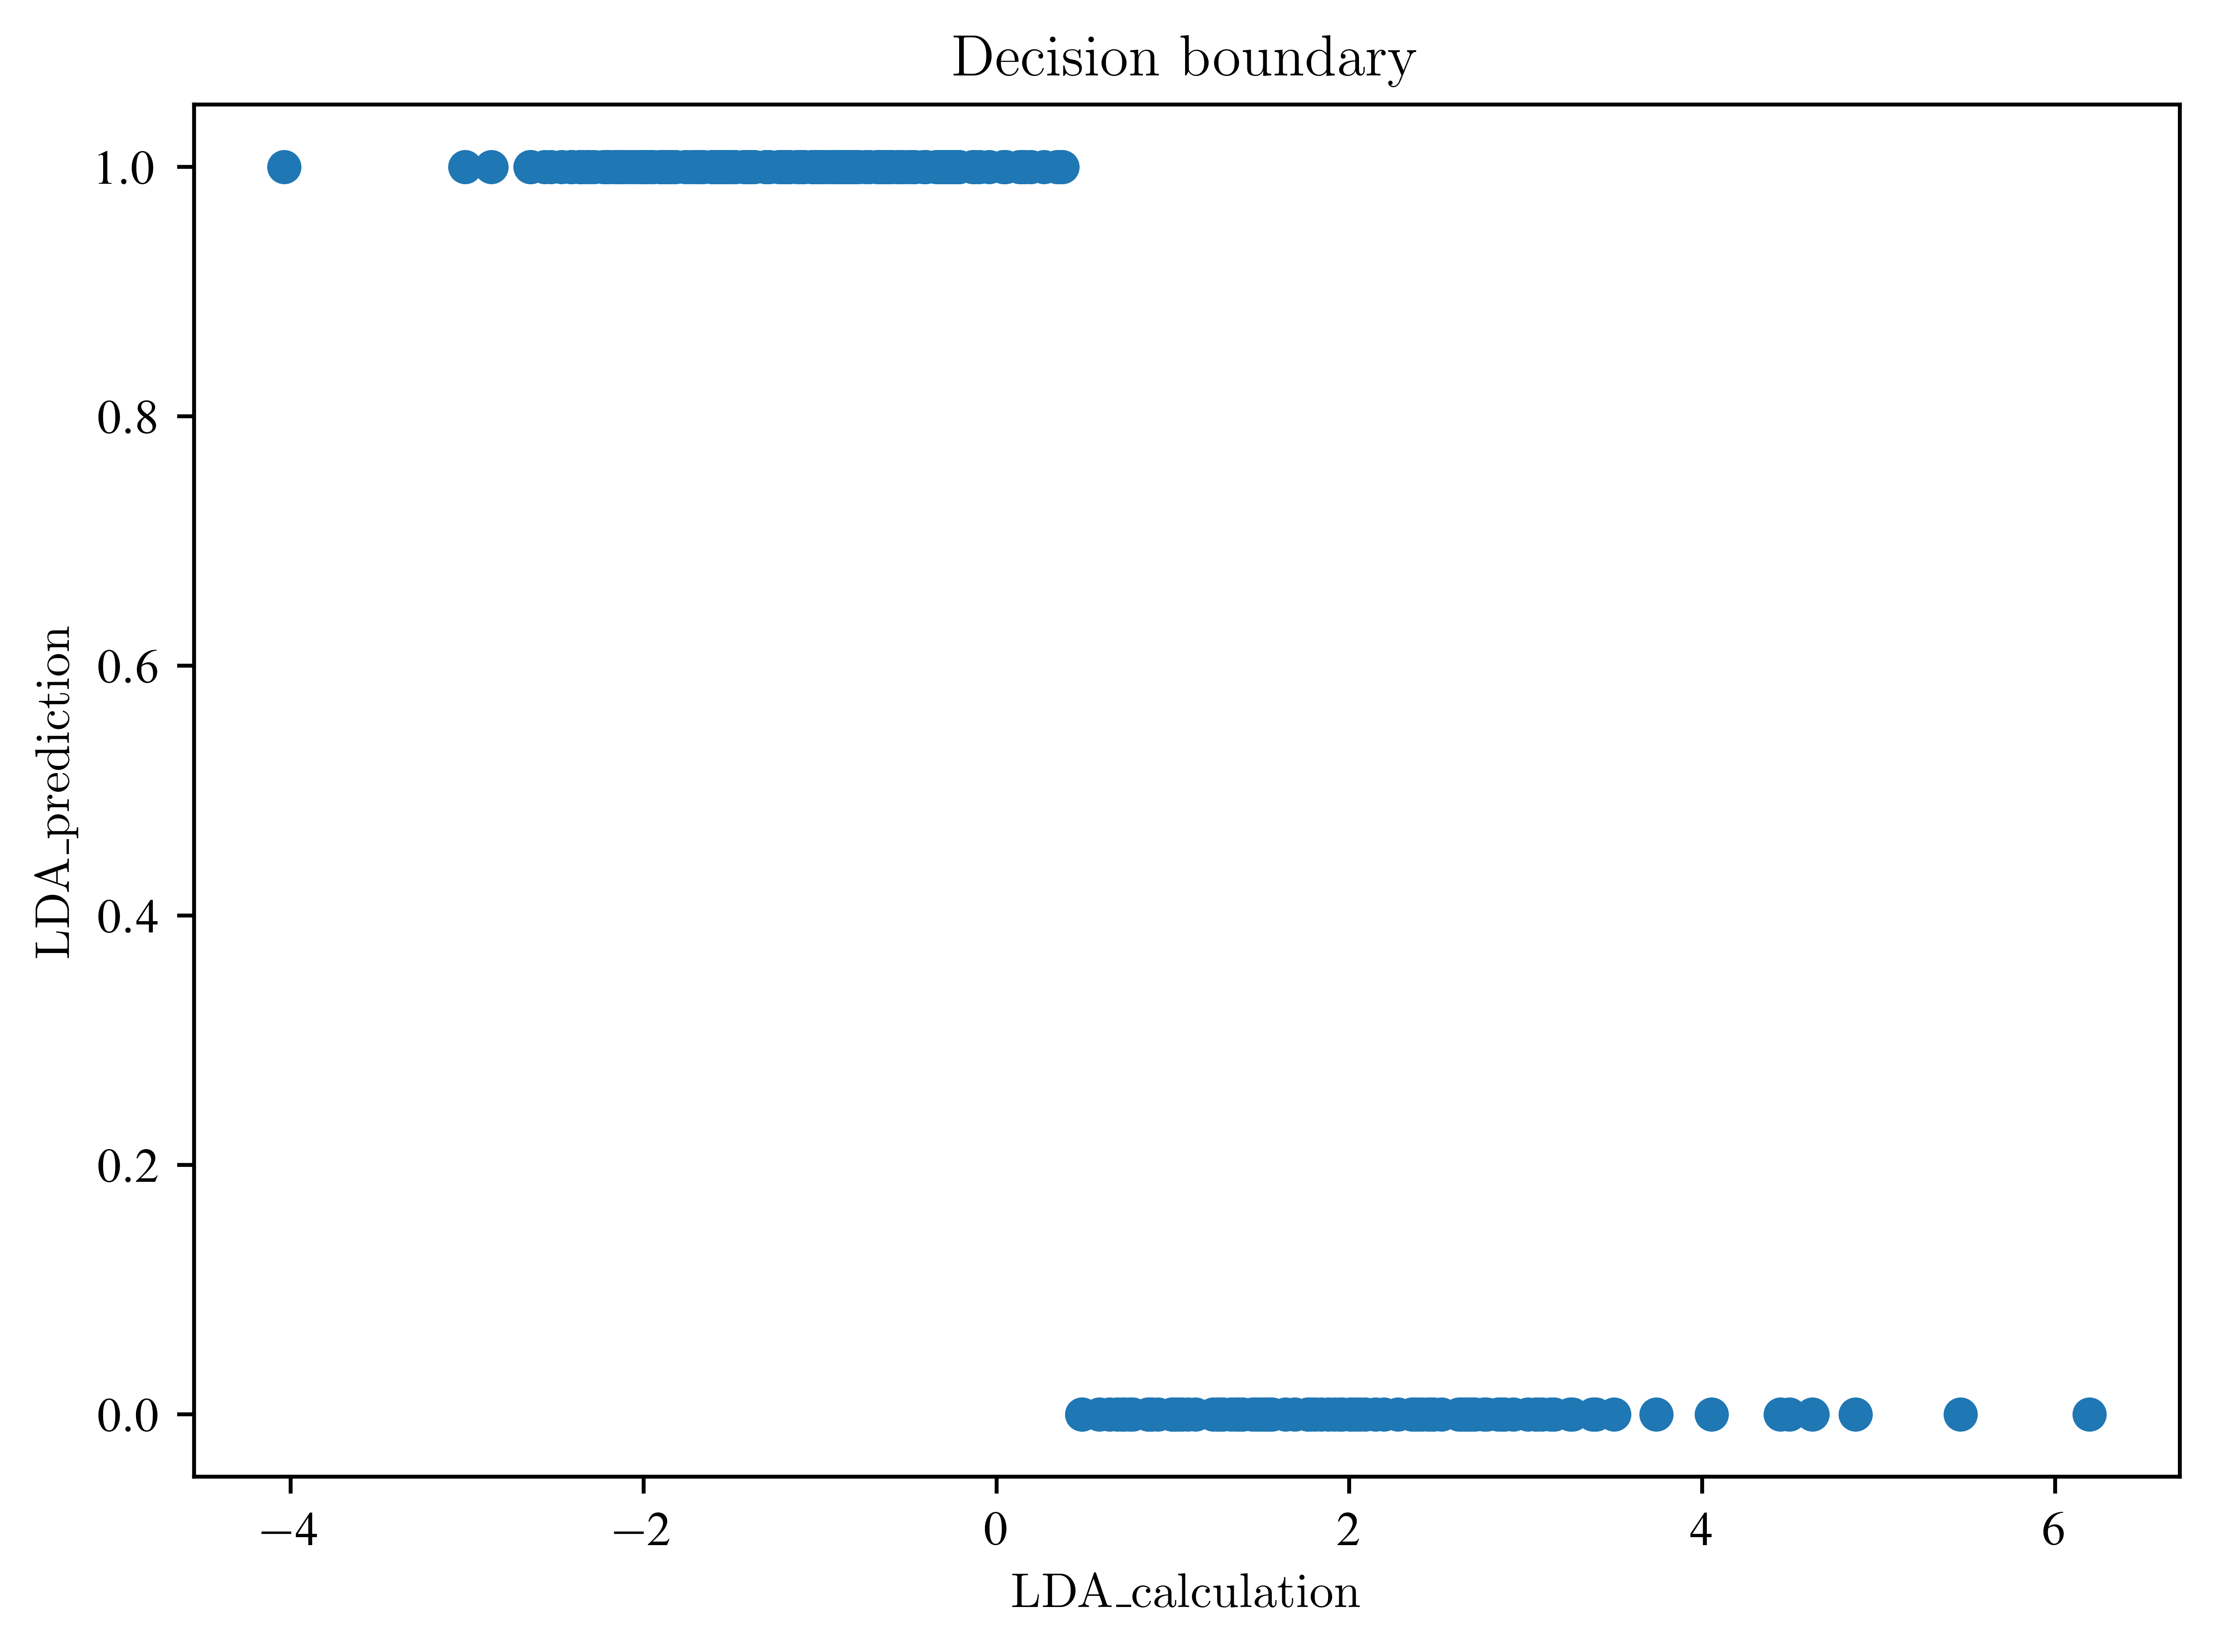

In [14]:
# look at the decision boundary
lda_prediction = lda.predict(X_train)
mask = np.argsort(lda_prediction)
lda_prediction = lda_prediction[mask]
data_lda = data_lda[mask]

# now both arrays are sorted
mask2 = lda_prediction < 0.5
bdry = np.max(data_lda[mask2])
print(bdry)
plt.figure()
plt.plot(data_lda, lda_prediction, "o")
plt.title("Decision boundary")
plt.xlabel("LDA_calculation")
plt.ylabel("LDA_prediction")
plt.show()

Explain the last plot. What is the difference between the transformed data and the prediction?

### Apply to test data

Accuracy: 0.9578947368421052


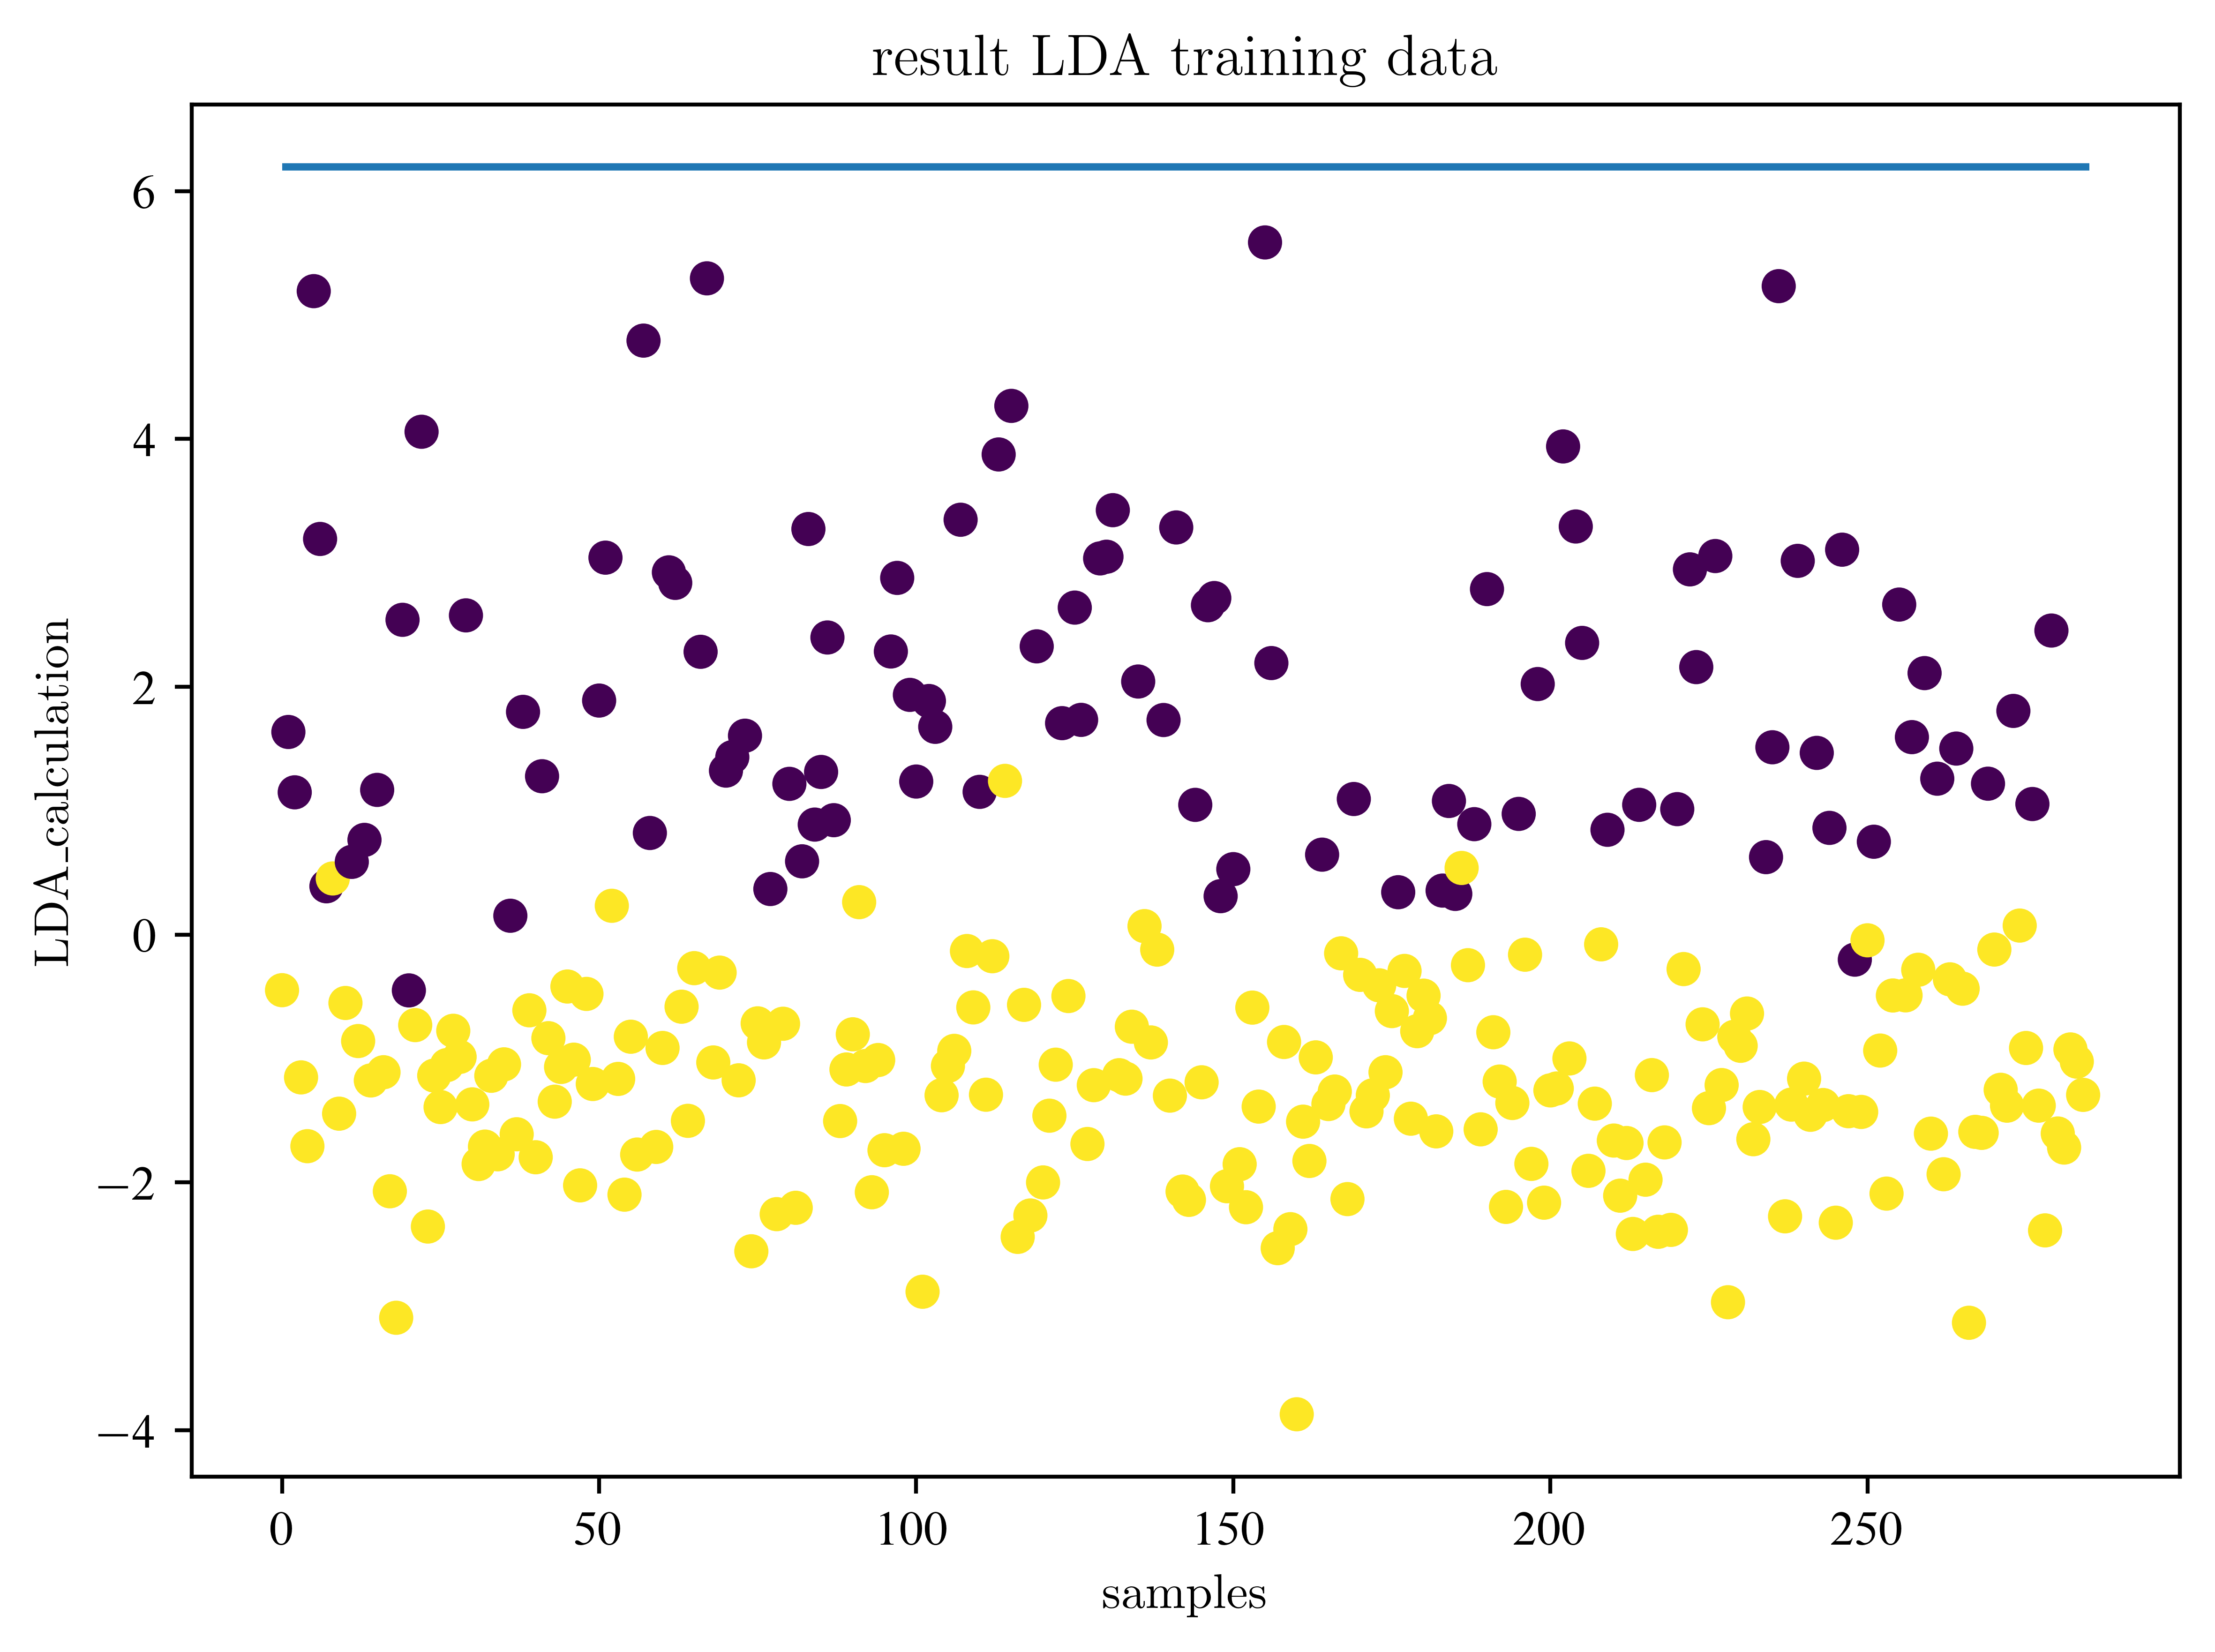

In [15]:
accuracy = lda.score(X_test, y_test)
print("Accuracy:", accuracy)

lda_test_data = lda.transform(X_test)
samples = np.arange(lda_test_data.shape[0])
plt.scatter(samples, lda_test_data, c=y_test)
plt.hlines(bdry, 0, lda_test_data.shape[0])
plt.title("result LDA training data")
plt.xlabel("samples")
plt.ylabel("LDA_calculation")
plt.show()

How the results change, when we change the number of PCA components? Find a good measure to check this. 

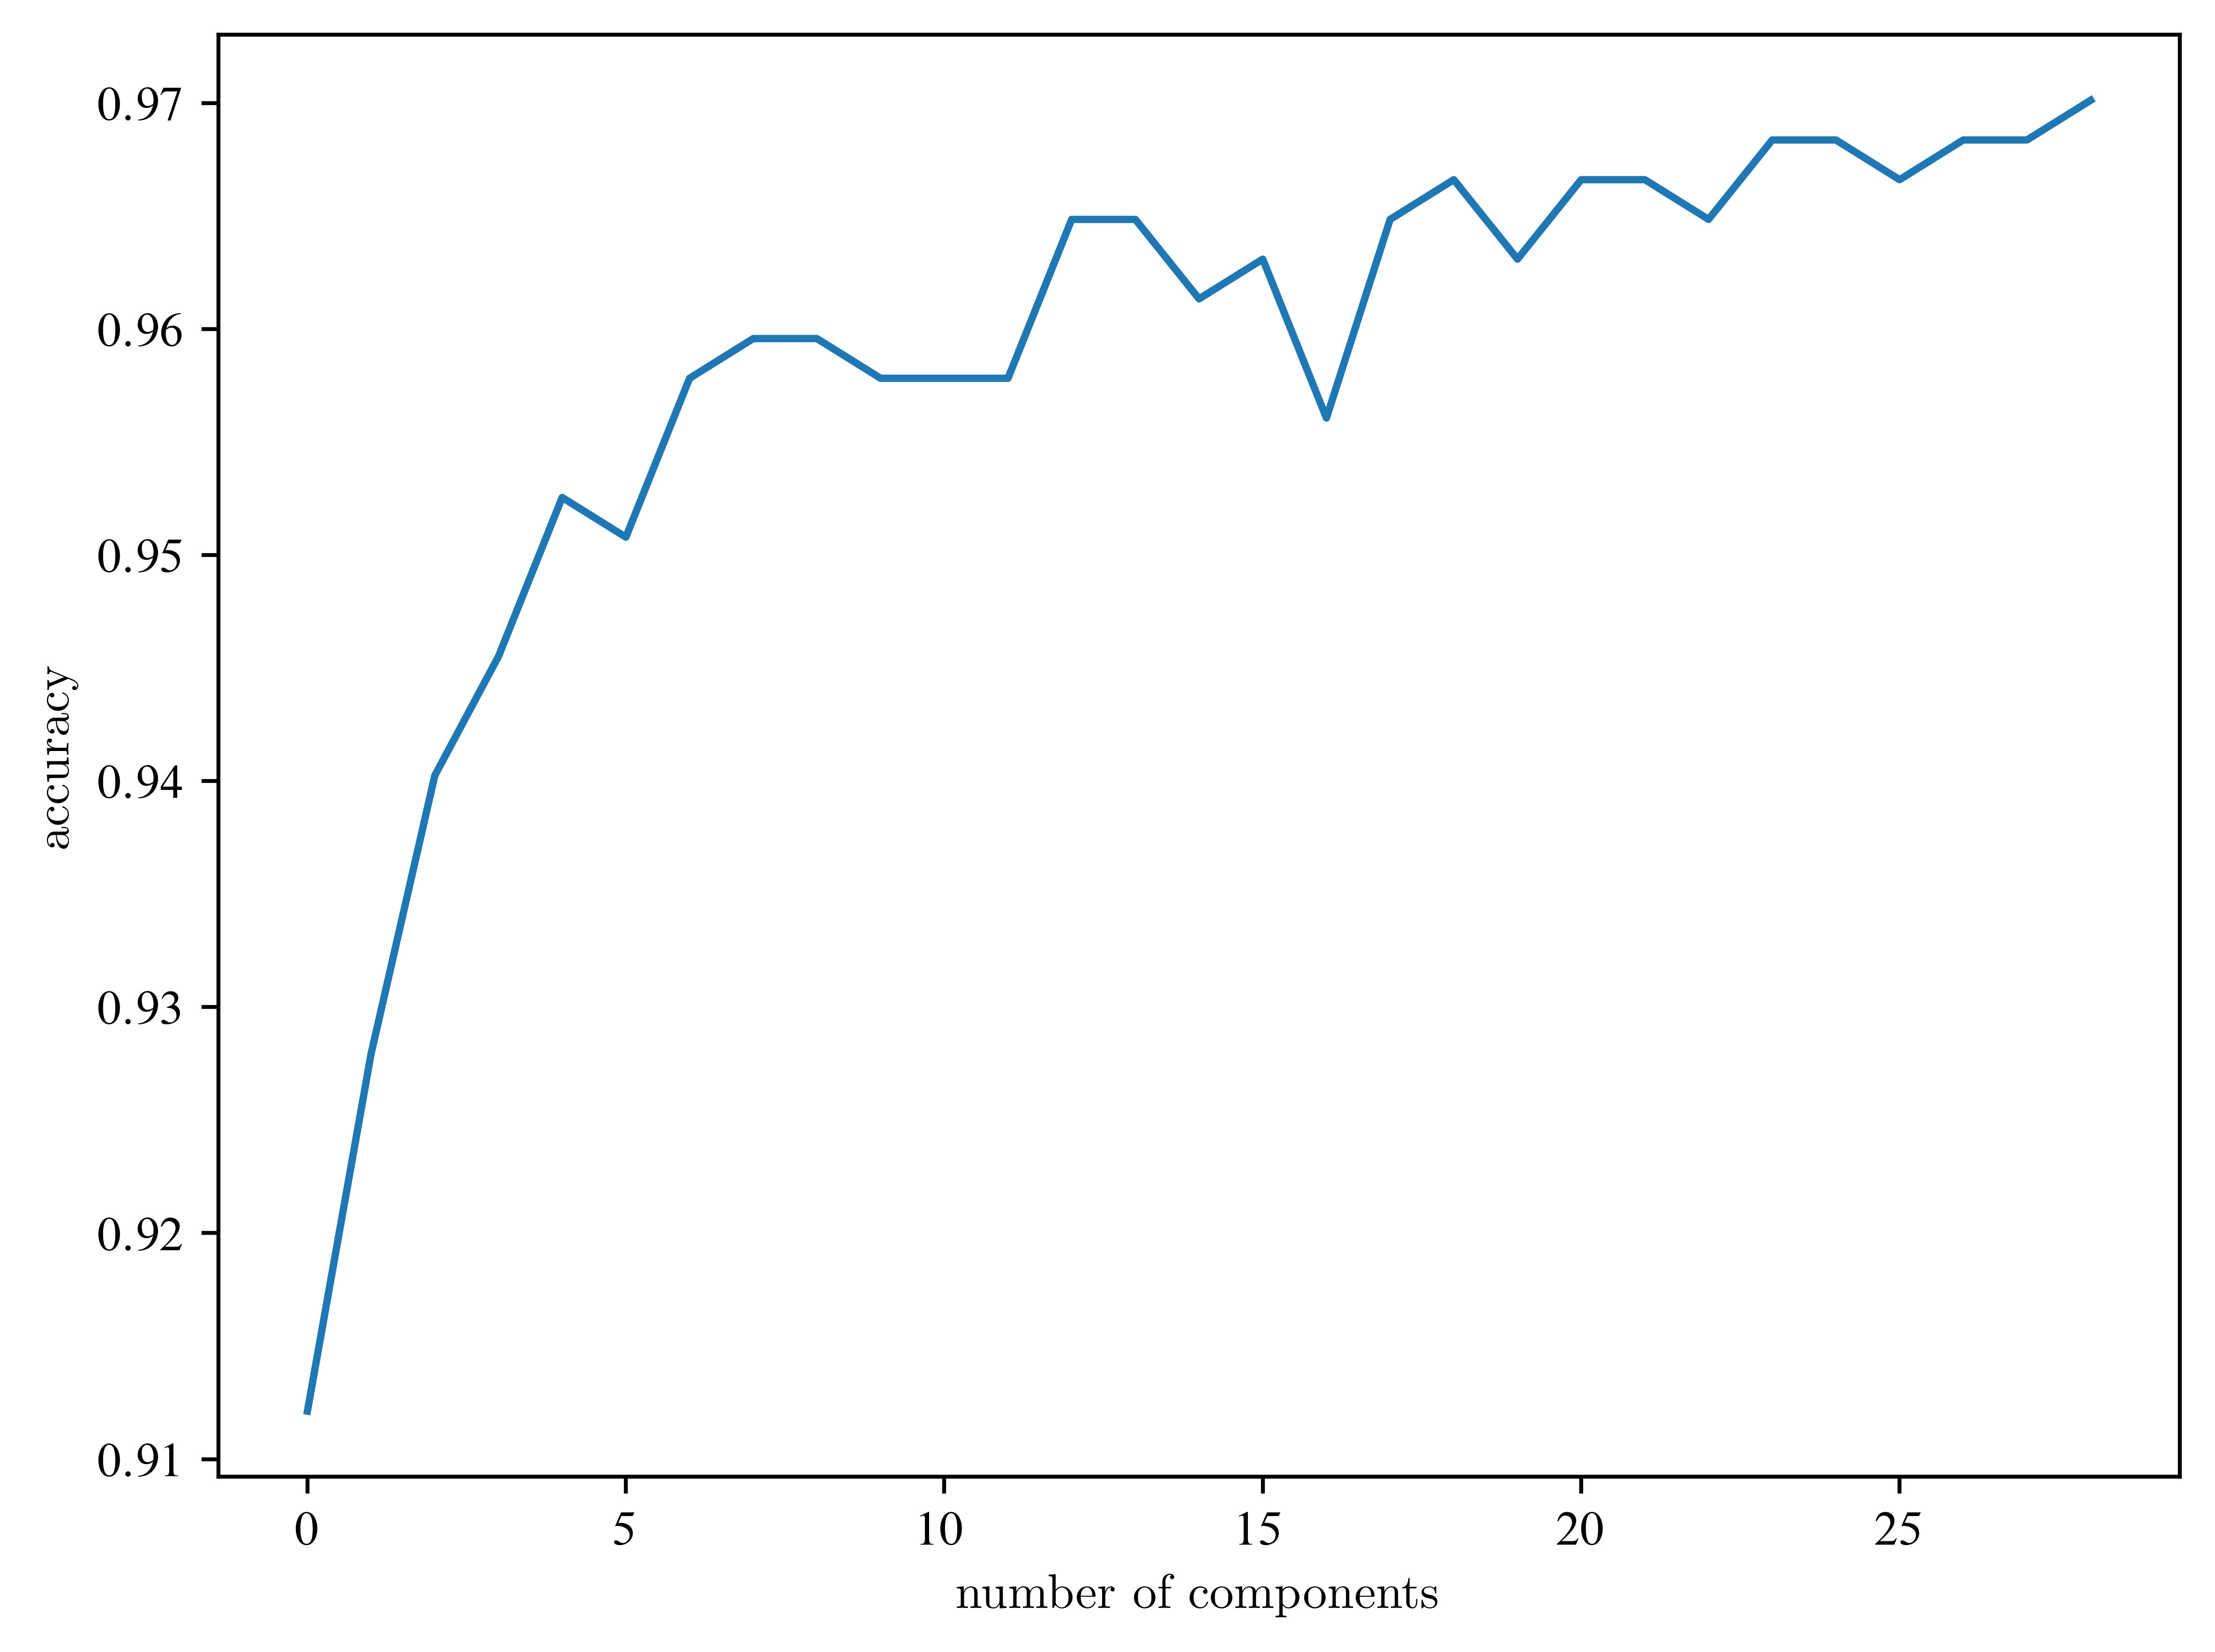

In [16]:
accuracies = []
for i in range(1, 30):
    pca = PCA(n_components=i)  # create object
    data_pca = pca.fit_transform(
        normalized_df
    )  # calculate new values (fit) and apply it (transform)
    lda = LinearDiscriminantAnalysis(n_components=1)
    data_lda = lda.fit_transform(data_pca, data_handler["target"])
    accuracy = lda.score(data_pca, data_handler["target"])
    accuracies.append(accuracy)
plt.figure()
plt.plot(accuracies)
plt.xlabel("number of components")
plt.ylabel("accuracy")
plt.show()

What is influence of division of the dataset?

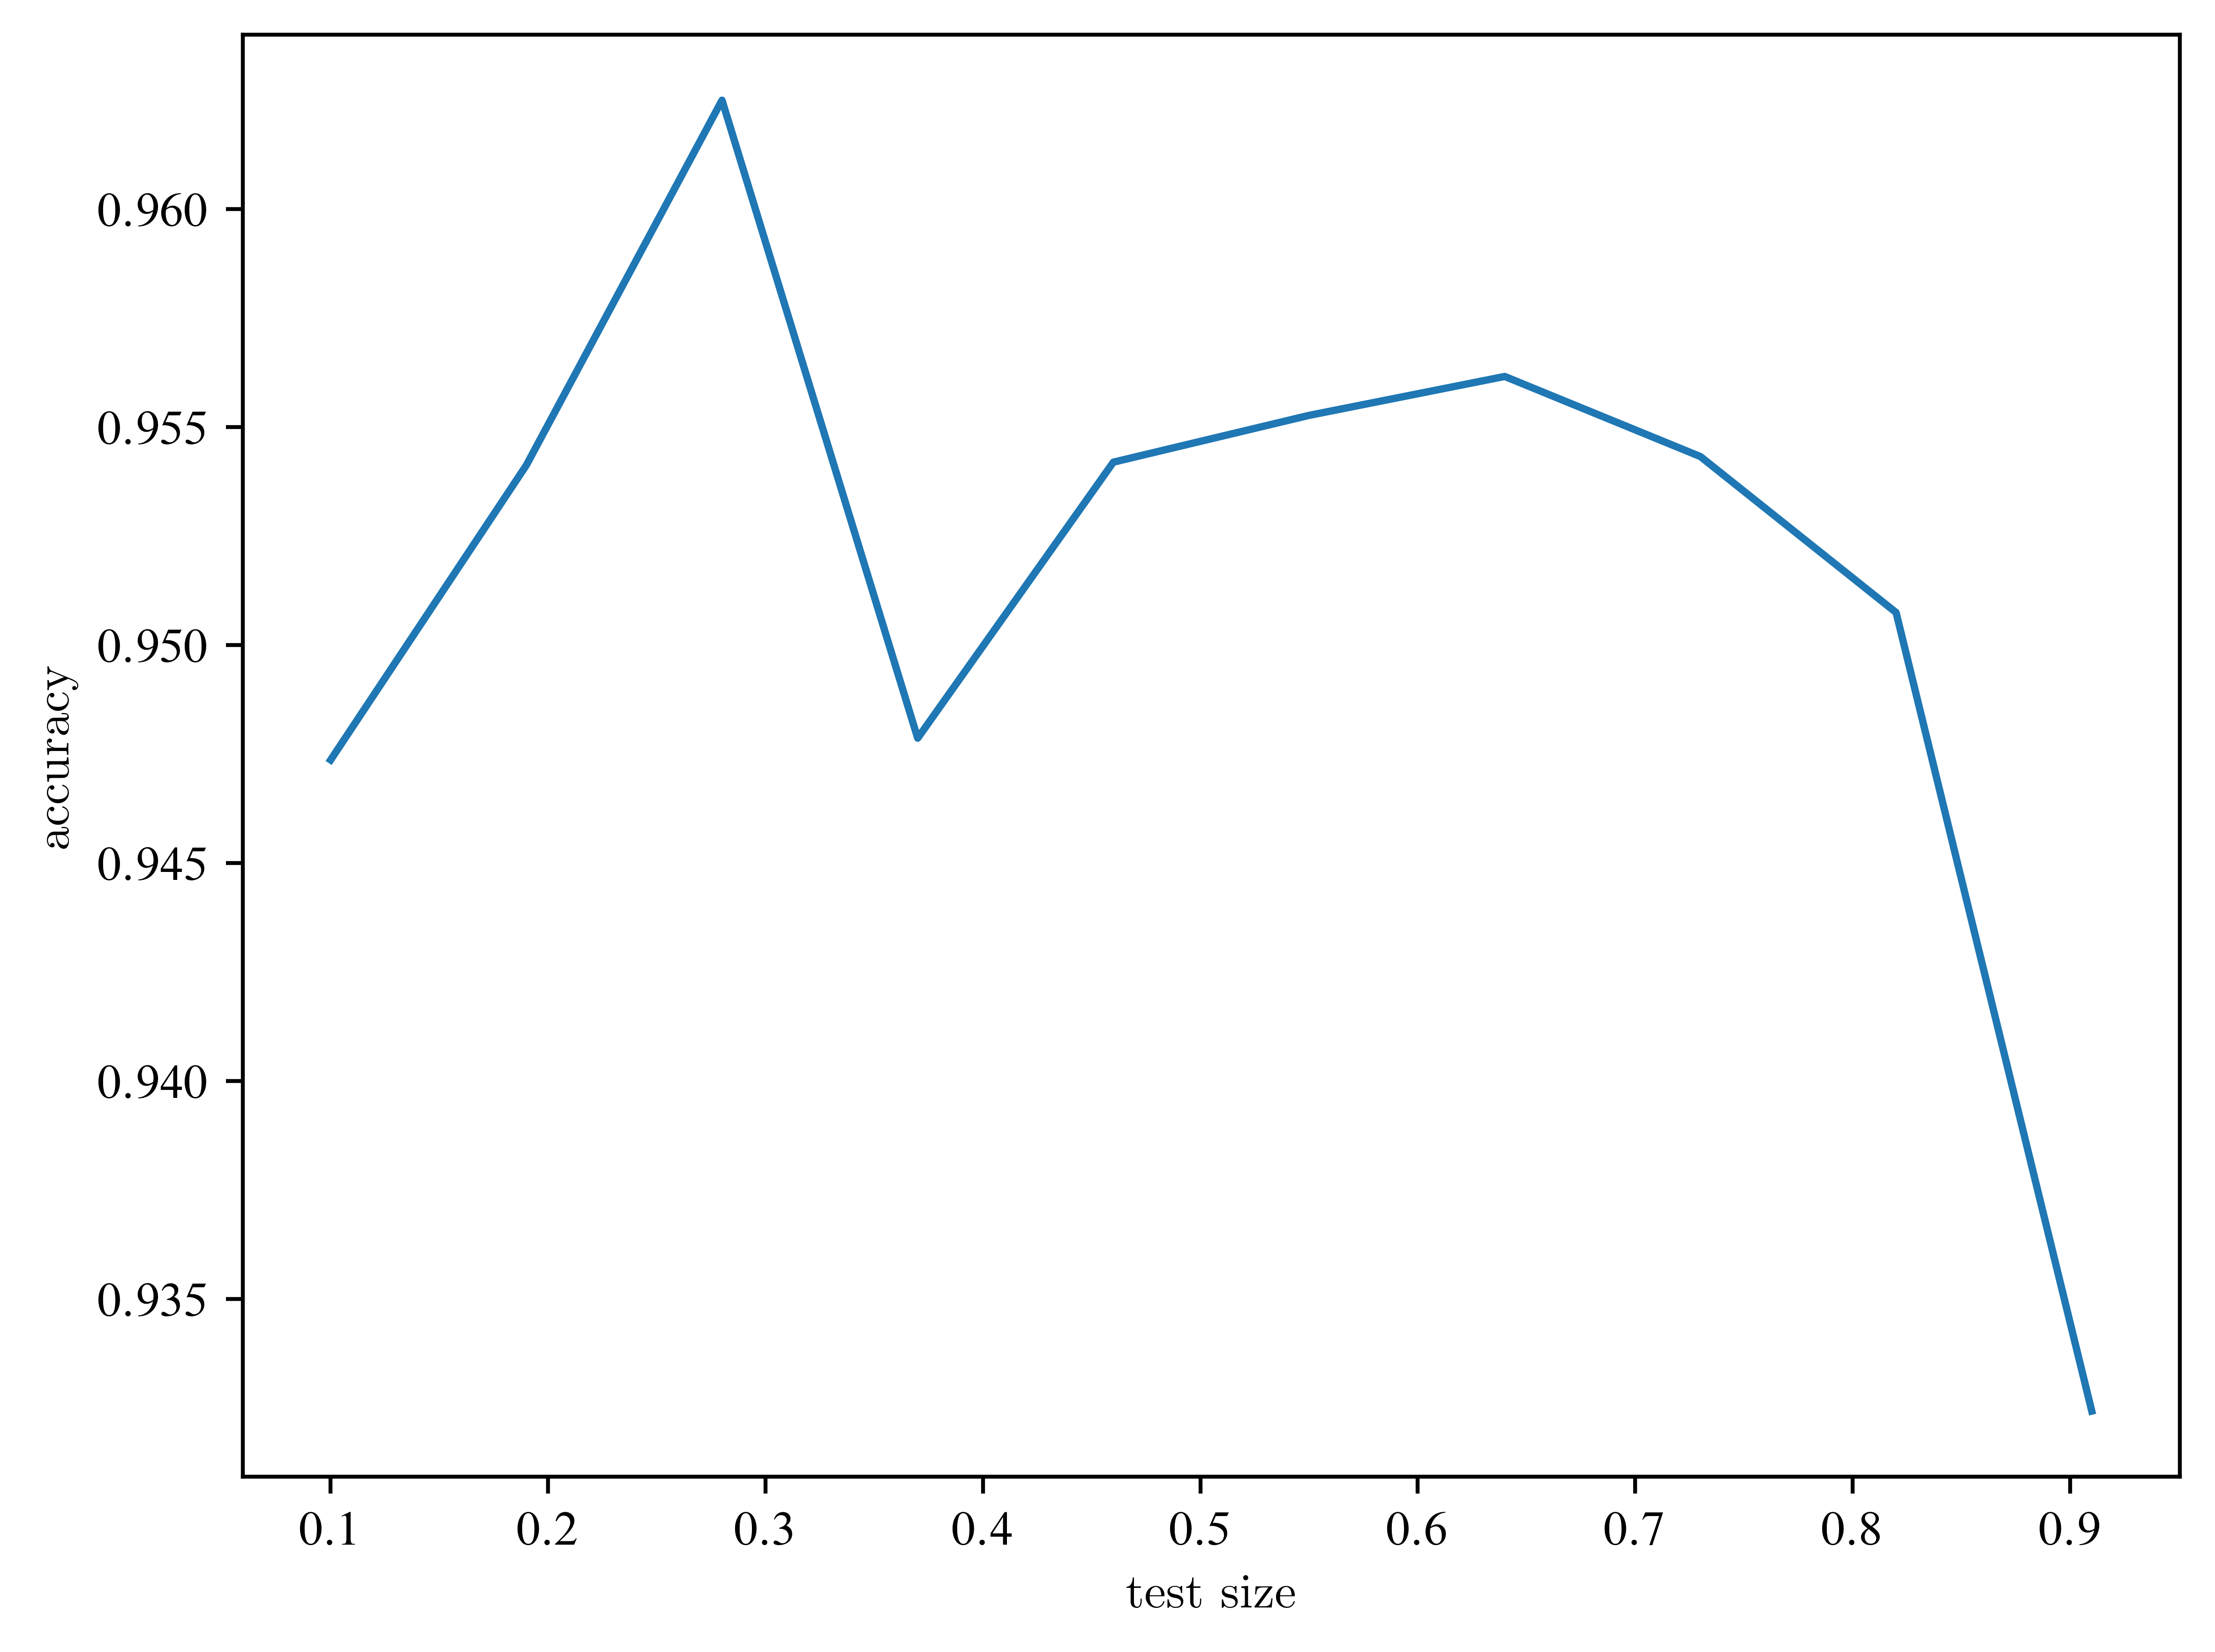

In [17]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(normalized_df)
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, data_handler["target"], test_size=0.5, random_state=42
)


n = 10
test_sizes = np.linspace(0.1, 1, n, endpoint=False)

accuracies = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(
        data_pca, data_handler["target"], test_size=test_sizes[i], random_state=42
    )
    lda = LinearDiscriminantAnalysis(n_components=1)
    data_lda = lda.fit_transform(X_train, y_train)
    accuracy = lda.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure()
plt.plot(test_sizes, accuracies)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.show()

Look at the axes? Is the effect relevant?